In [11]:
import numpy as np
import pandas as pd

name = ['하하','김범수','다현','아이유','최민식','김혜수']
job = ['가수','가수','가수','가수','배우','배우']
height = [ 172, 182, 158, 160, 177, 170]
sex = ['M','M','F','F','M','F']

num = 0
node_list = {}

data = pd.DataFrame({'이름': name,'직업':job,'키':height,'성별':sex})

def Job_Node(df,idx,depth):
    
    global num
    global node_list
    print('Node_num: {} | Node Depth: {} | Job_Node'.format(num,depth))
    node_list[num] = 'Job_Node'
    
    singer = []
    
    for i in idx:
        if df['직업'][i]=='가수':
            singer.append(i)
        else:
            num +=1
            print('Node_num: {} | Node Depth: {} | Name: {}'.format(num,depth+1,
                                                                    data['이름'][i]))
            node_list[num] = data['이름'][i]
    print('가수 index: ', singer)
    Height_Node(df,singer,depth+1)
    
def Height_Node(df, idx, depth):
    global num
    global node_list
    print('Node_num: {} | Node Depth: {} | Height_Node'.format(num,depth))
    node_list[num] = 'Height_Node'
    
    for i in idx:
        num +=1
        if df['성별'][i] == 'M':
            if df['키'][i] < 180:
                print('Node_num: {} | Node Depth: {} | Name: {}'.format(num,depth+1,
                                                                data['이름'][i]))
            else:
                print('Node_num: {} | Node Depth: {} | Name: {}'.format(num,depth+1,
                                                                    data['이름'][i]))
        else:
            if df['키'][i] < 160:
                print('Node_num: {} | Node Depth: {} | Name: {}'.format(num,depth+1,
                                                                data['이름'][i]))
            else:
                print('Node_num: {} | Node Depth: {} | Name: {}'.format(num,depth+1,
                                                                    data['이름'][i]))
        
    
    
def Sex_Node(df,depth):
    global num 
    global node_list
    
    num += 1
    print('Node_num: {} | Node Depth: {} | Sex_Node'.format(num,depth))
    node_list[num] = 'Sex_Node'
    
    male = []
    female = []
    for idx, sex in enumerate(df['성별']):
        if sex == 'M':
            male.append(idx)
        elif sex == 'F':
            female.append(idx)
        
    print('남자: Index: ', male)
    print('여자: Index: ',female)
    
    Job_Node(df, male, depth +1 )
    Job_Node(df, female, depth + 1)
def main():
    Sex_Node(data, 1)
    print(data)
    #print(node_list)
main()

Node_num: 1 | Node Depth: 1 | Sex_Node
남자: Index:  [0, 1, 4]
여자: Index:  [2, 3, 5]
Node_num: 1 | Node Depth: 2 | Job_Node
Node_num: 2 | Node Depth: 3 | Name: 최민식
가수 index:  [0, 1]
Node_num: 2 | Node Depth: 3 | Height_Node
Node_num: 3 | Node Depth: 4 | Name: 하하
Node_num: 4 | Node Depth: 4 | Name: 김범수
Node_num: 4 | Node Depth: 2 | Job_Node
Node_num: 5 | Node Depth: 3 | Name: 김혜수
가수 index:  [2, 3]
Node_num: 5 | Node Depth: 3 | Height_Node
Node_num: 6 | Node Depth: 4 | Name: 다현
Node_num: 7 | Node Depth: 4 | Name: 아이유
    이름  직업    키 성별
0   하하  가수  172  M
1  김범수  가수  182  M
2   다현  가수  158  F
3  아이유  가수  160  F
4  최민식  배우  177  M
5  김혜수  배우  170  F


### 의사 결정나무-회귀

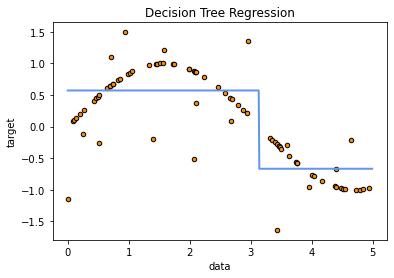

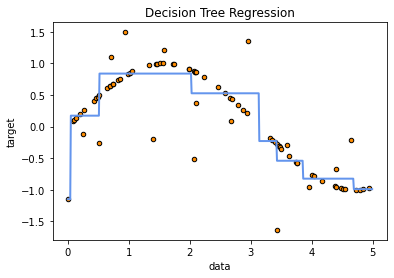

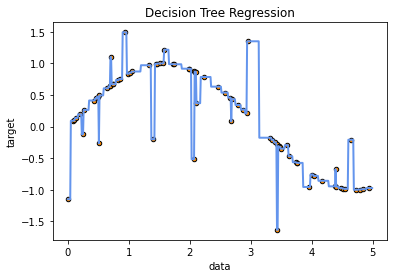

In [23]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

def load_data():
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80,1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 *(0.5 -rng.rand(16))
    
    #fig ,ax = plt.subplots()
    #ax.scatter(X.ravel(),y)
    return X,y
    
def DT_Reg(X,y,X_test,m_depth):
    reg = DecisionTreeRegressor(max_depth = m_depth)
    reg.fit(X,y)
    pred = reg.predict(X_test)
    return pred
def Visualize(X,y,X_test,depth):
    plt.figure()
    plt.scatter(X,y,s=20, edgecolor='black',
                c = 'darkorange', label='data')
    plt.plot(X_test,depth,color='cornflowerblue',
             label = 'max_depth_1', linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.show()

def main():
    X,y = load_data()
    
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] # (500,1)
    
    y_1 = DT_Reg(X,y,X_test, 1)
    #print("y_1\n",y_1)
    Visualize(X,y,X_test,y_1)
    
    y_1 = DT_Reg(X,y,X_test, 3)
    Visualize(X,y,X_test,y_1)
    
    y_1 = DT_Reg(X,y,X_test, 20)
    Visualize(X,y,X_test,y_1)
    
main()

###  의사 결정 나무 - 분류

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def load_data():
    X,y = load_iris(return_X_y = True)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, 
    random_state = 100)
    return train_X, test_X, train_y, test_y

def DT_Clf(train_X,train_y, test_X):
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    pred = clf.predict(test_X)
    return pred

def main():
    train_X,test_X,train_y,test_y = load_data()
    pred = DT_Clf(train_X,train_y, test_X)
    print("테스트 데이터에 대한 예측 정확도: {0:.4f}".format(accuracy_score(test_y, pred)))
    
main()

테스트 데이터에 대한 예측 정확도: 0.9667


In [30]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [31]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [32]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node.
		node=4 is a leaf node.


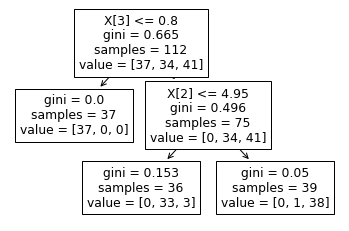

In [33]:
tree.plot_tree(clf)
plt.show()

### Graphviz

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier(random_state = 156)

iris_data = load_iris()

train_X, test_X, train_y, test_y = train_test_split(iris_data.data,
            iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
               feature_names=iris_data.feature_names,impurity=True, filled=True)

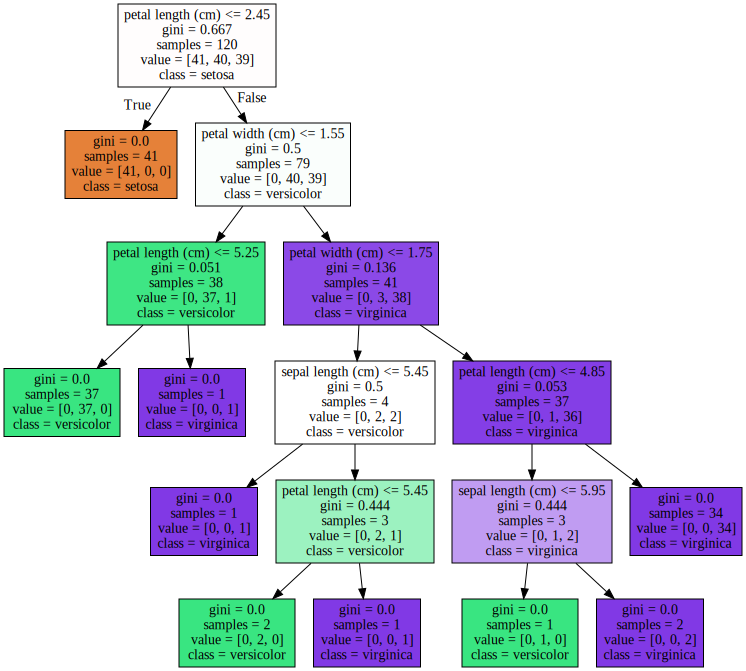

In [5]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline
print("Feature importances: \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

Feature importances: 
[0.025 0.    0.555 0.42 ]


<AxesSubplot:>

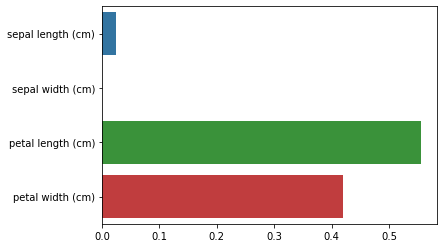

In [7]:
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리(Decision Tree) 과적합(Overfitting)

(100, 2) (100,)
[[ 0.12041909 -1.68941375]
 [ 1.09665605  1.79445113]
 [ 0.88426577  1.43370121]
 [ 0.95048011 -0.56202253]
 [ 1.04421447  0.02899023]]
[0 1 1 1 2]


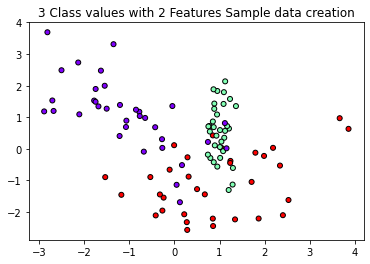

In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, 
        n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_features[: ,0], X_features[:, 1], marker='o', c=y_labels, s=25, 
           cmap = 'rainbow', edgecolor='k')
print(X_features.shape, y_labels.shape)
print(X_features[0:5])
print(y_labels[0:5])

In [19]:
import numpy as np

def visualize_boundary(model, X,y):
    fig, ax = plt.subplots()
    
    ax.scatter(X[:,0], X[:,1], c=y, s=25,cmap='rainbow', edgecolor='k',
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    model.fit(X,y)
    xx,yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                       np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx,yy,Z, alpha=0.3, levels=np.arange(n_classes + 1)-0.5,
                          cmap='rainbow', zorder=1)

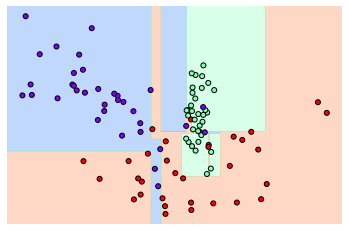

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

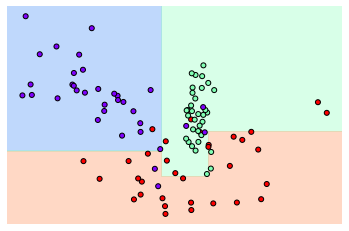

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 앙상블(Ensemble) 기법 - Voting
* Voting은 의미 그대로 투표를 통해 값을 결정하는 것
* Hard Voting, Soft Voting
* Hard Voting - 다수의 분류기가 예측한 값을 최종 값으로 선택
* Soft Voting - 각 레이블 별로 예측 확률을 낸 후 평균을 내어 최종 값 선택
* 일반적으로 Soft Voting이 성능이 좋음

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def load_data():
    X,y = load_breast_cancer(return_X_y = True)
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2,
          random_state=100)
    return train_X,test_X,train_y,test_y
def Voting_Clf(train_X,test_X,train_y, test_y):
    lr_clf = LogisticRegression(solver='liblinear')
    knn_clf = KNeighborsClassifier()
    
    vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN', knn_clf)],
                             voting='soft')
    vo_clf.fit(train_X, train_y)
    pred = vo_clf.predict(test_X)
    return lr_clf, knn_clf, vo_clf, pred
def main():
    train_X, test_X, train_y, test_y = load_data()
    lr_clf, knn_clf, vo_clf, pred = Voting_Clf(train_X,test_X, train_y, test_y)
    print('>Voting Classifier 정확도: {0: .4f}'.format(accuracy_score(test_y,pred)))
    
    classifiers = [lr_clf,knn_clf]
    for classifier in classifiers:
        classifier.fit(train_X, train_y)
        pred = classifier.predict(test_X)
        class_name = classifier.__class__.__name__
        print(">{0} 정확도: {1:.4f}".format(class_name,accuracy_score(test_y,pred)))
main()

>Voting Classifier 정확도:  0.9737
>LogisticRegression 정확도: 0.9474
>KNeighborsClassifier 정확도: 0.9474


### 앙상블(Ensemble)기법 - Bagging
* 동일한 분류 모델만을 사용해야 한다.

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

def load_data():
    X,y = load_breast_cancer(return_X_y=True)
    train_X,test_X,train_y, test_y = train_test_split(X,y, test_size=0.2,
                                    random_state = 156)
    return train_X, test_X, train_y,test_y

def Bagging_Clf(train_X, test_X, train_y, test_y):
    ba_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                               n_estimators = 100)
    ba_clf.fit(train_X,train_y)
    pred = ba_clf.predict(test_X)
    return ba_clf, pred
def main():
    train_X, test_X, train_y, test_y = load_data()
    ba_clf, pred = Bagging_Clf(train_X, test_X, train_y, test_y)
    print("Bagging Classifier 정확도: {0:.4f}".format(accuracy_score(test_y,pred)))
    
    single_dt = DecisionTreeClassifier()
    single_dt.fit(train_X,train_y)
    single_pred = single_dt.predict(test_X)
    print("Single Decision Tree Classifier 정확도: {0:.4f}".format
          (accuracy_score(test_y,single_pred)))
main()

Bagging Classifier 정확도: 0.9561
Single Decision Tree Classifier 정확도: 0.9474


In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def load_data():
    X,y = load_breast_cancer(return_X_y=True)
    train_X,test_X,train_y, test_y = train_test_split(X,y, test_size=0.2,
                                    random_state = 156)
    return train_X, test_X, train_y,test_y

def Bagging_Clf(train_X, test_X, train_y, test_y, model): 
    model_pred = []
    for i in range(len(model)):
        ba_clf = BaggingClassifier(base_estimator=model[i],
                               n_estimators = 100)
        ba_clf.fit(train_X,train_y)
        pred = ba_clf.predict(test_X)
        model_pred.append((ba_clf,pred))
        
    return model_pred
def main():
    model = []
    train_X, test_X, train_y, test_y = load_data()
    lr_clf = LogisticRegression(solver='liblinear')
    knn_clf = KNeighborsClassifier()
    model.append(lr_clf)
    model.append(knn_clf)
    model_pred = Bagging_Clf(train_X, test_X, train_y, test_y,model)
    print("Bagging LogisticRegression 정확도: {0:.4f}".format(
                  accuracy_score(test_y,model_pred[0][1])))
    print("Bagging KNeighborsClassifier 정확도: {0:.4f}".format(
                  accuracy_score(test_y,model_pred[1][1])))
    
    lr_clf.fit(train_X,train_y)
    lr_clf_pred = lr_clf.predict(test_X)
    print("Single LogisticRegression 정확도: {0:.4f}".format
          (accuracy_score(test_y,lr_clf_pred)))
    knn_clf.fit(train_X,train_y)
    knn_clf_pred = knn_clf.predict(test_X)
    print("Single KNeighborsClassifier 정확도: {0:.4f}".format
          (accuracy_score(test_y,knn_clf_pred)))
main()

Bagging LogisticRegression 정확도: 0.9474
Bagging KNeighborsClassifier 정확도: 0.9386
Single LogisticRegression 정확도: 0.9474
Single KNeighborsClassifier 정확도: 0.9035


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

def load_data():
    X,y = load_breast_cancer(return_X_y=True)
    train_X,test_X,train_y, test_y = train_test_split(X,y, test_size=0.2,
                                    random_state = 156)
    return train_X, test_X, train_y,test_y

def Random_clf(train_X, train_y, test_X):
    rfc = RandomForestClassifier()
    rfc.fit(train_X, train_y)
    pred = rfc.predict(test_X)
    return rfc, pred
def main():
    train_X, test_X, train_y,test_y = load_data()
    rfc,pred = Random_clf(train_X, train_y, test_X)
    
    print('테스트 데이터 예측 정확도: {0:.4f}'.format(accuracy_score(test_y,pred)))
    
main()

테스트 데이터 예측 정확도: 0.9474
